In [1]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Initialize the engine and register
#eng,q = sf.Engine('fock')
prog = sf.Program(1)

In [3]:
with prog.context as q:
    Fock(2) | q[0]
    S = Sgate(1)
    S | q[0]

In [4]:
#run the engine
#state = eng.run("fock", cutoff_dim=7)
eng=sf.Engine('fock', backend_options={"cutoff_dim": 15})
state=eng.run(prog).state

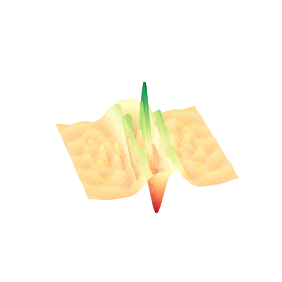

In [10]:
# Visualize Wigner function and optical phase space
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
# Set the azimuth and elevation angles
ax.view_init(azim=75, elev=30)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()